<a href="https://colab.research.google.com/github/phkang0330/NFT/blob/main/NCAA_FT_Coach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and upgrade libraries
!pip install --upgrade numpy gensim nltk pyLDAvis preprocessor rake-nltk emoji

# Restart runtime
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 18.9 MB/s eta 0:00:00
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4474 sha256=75a4b8c04dab4096148f9a204b03d423b1563641e795b43ce038676ab490c34b
  Stored in directory: /root/.cache/pip/wheels/60/33/31/972a156cd609581707e69298b91f0e42d349c08fefc173e19e
Successfully built preprocessor
  Attempting uninstall: 

In [ ]:
!pip install gensim nltk
!pip install --upgrade jupyter_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter_client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.7 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
jupyter-kernel-gateway 2.5.2 requires jupyter-client<8.0,>=5.2.0, but you have jupyter-client 8.6.3 which is incompatible.


In [ ]:
# After restart, run this cell and the rest of your code
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)
import pandas as pd
import numpy as np
import io

import tweepy
import csv
import preprocessor as p

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk import pos_tag, word_tokenize

from pprint import pprint
import spacy

import gensim
import gensim.corpora as corpora
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore,Word2Vec, FastText, CoherenceModel, LdaModel

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cosine

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import pickle
from tqdm import tqdm

import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from rake_nltk import Rake


import umap
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px

In [ ]:
# Download NLTK resources (required in Colab)
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stop words
nltk.download('wordnet')  # For lemmatization
nltk.download('punkt_tab') # for other languages tokenization
nltk.download('averaged_perceptron_tagger_eng') # Download the specific resource needed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Load the CSV file with specified encoding and low_memory=False to avoid DtypeWarning
df = pd.read_csv('/content/drive/MyDrive/Data/NCAA_Coach/NCAA_Job.csv')

# Select the 'title' column for LDA Topic modeling
text = df['text']

# Drop rows with NaN values in the 'Title' column
text = text.dropna()

print(text)

0       Bachelor's degree from an accredited college o...
1       5 years of experience coaching Softball at the...
2       Proven experience working with and improving t...
3       Must clear and maintain a favorable background...
4       Must maintain a valid driver's license, motor ...
                              ...                        
3100    Excellent written and verbal communication skills
3101       Strong organizational and multitasking ability
3102    Bachelor’s degree from a four-year accredited ...
3103      Competitive Bass Fishing experience preferred. 
3104    Experience supervising young adults and managi...
Name: text, Length: 3105, dtype: object


#Text Preprocessing

In [ ]:
# =========================
# Fast, Safe Preprocessing
# =========================

import re
import pandas as pd
import nltk

# --- Ensure NLTK resources once ---
try:
    _ = nltk.corpus.stopwords.words("english")
except LookupError:
    nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

# -------------------------------
# 1) Load CSV robustly
# -------------------------------
csv_path = "/content/drive/MyDrive/Data/NCAA_Coach/NCAA_Job.csv"
try:
    df = pd.read_csv(csv_path, encoding="utf-8", low_memory=False)
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="latin1", low_memory=False)

if "text" not in df.columns:
    raise KeyError(f"'text' column not found. Columns: {list(df.columns)[:20]} ...")

# Work off a clean Series: drop NAs/blanks, keep original index for alignment
text = (
    df["text"]
    .dropna()
    .astype(str)
    .str.strip()
)
text = text[text.str.len() > 0]
# text = text.drop_duplicates()  # optional if lots of exact dup lines

print("Rows x Cols:", df.shape, "| Usable text rows:", len(text))

# -------------------------------
# 2) Stopword configuration (yours)
# -------------------------------
nltk_stopwords = set(stopwords.words('english'))

custom_stopwords = {
    # School and conference names / acronyms
    "iii","ii","i","st","marys","ave","maria","southern","washington","viterbo","letourneau",
    "gannon","colorado","hamilton","nebraska","wesleyan","utc","buena","vista","centenary",
    "kings","sou","dyouville","knox","prairie","sweet","briar","walsh","franciscan",
    "huntington","millikin","oregon","maine","york","universitys","academy","campus",
    "school","schools","graduate","graduates","graduation","baccalaureate","diploma","ged",
    "collegiate","intercollegiate",

    # Conferences and athletic associations
    "glvc","cc","mac","mwc","odac","scac","sliac","diiisliac","socon","uchc","naia","ncata",
    "msu","mvc","centennial","naias","lone","star","sun","nescac","cciw","uscaa","uscsa",
    "njcaa","nec","accjc","ums","saa","dii","di","diii","ovc","mec","gsc","gulf","commonwealth","usa",

    # Sports/strength org acronyms
    "usbc","ussa","nsca","cscca","cscs","sccc",

    # Sport names (remove if you need sport-specific analysis)
    "softball","basketball","volleyball","cheer","cheerleader","cheerleading","fishing",
    "diving","gymnastics","tennis","wrestling","football","soccer","lacrosse",
    "swimming","aquatic","lifeguard","baseball","golf","match","roster","track",
    "cross","country","athletics","player","players","game","games","meet","meets",

    # Job-related generic terms
    "job","responsibility","responsibilities","task","tasks","role","position","positions",
    "duty","duties","center","conference","conferencencaa","work","employment","team",
    "athletic","department","ncaa","division","institution","program","programs","university",
    "college","head","assistant","coach","coaches","coachs","student","students","athlete",
    "athletes","studentathlete","studentathletes","student_athletes",

    # Time / availability / scheduling
    "week","weeks","weekday","weekdays","weekend","weekends","evening","evenings","morning",
    "mornings","overnight","overnights","hour","hours","day","days","season","seasons",
    "shift","shifts","schedule","schedules","scheduling","year","years","month","months",

    # Numeric words (cardinals/ordinals)
    "one","two","three","four","five","six","seven","eight","nine","ten","thirty",

    #un-necessary words
    "significant", "must","able","successful", "highly", "American"
}

all_stopwords = nltk_stopwords.union(custom_stopwords)

# -------------------------------
# 3) Precompiled regex (speed)
# -------------------------------
RE_DATE = re.compile(r"\d+/\d+/\d+")   # e.g., 4/9/25
RE_NUM  = re.compile(r"\b\d+\b")       # standalone numbers
RE_CONN = re.compile(r"[_\-/]")        # connectors
RE_PUNC = re.compile(r"[^\w\s]")       # punctuation
RE_WS   = re.compile(r"\s+")           # collapse whitespace

def clean_text(s: str) -> str:
    s = s.lower()
    s = RE_DATE.sub(" ", s)
    s = RE_NUM.sub(" ", s)
    s = RE_CONN.sub(" ", s)
    s = RE_PUNC.sub(" ", s)
    s = RE_WS.sub(" ", s).strip()
    return s

# Vectorized cleaning (fast)
cleaned = text.map(clean_text)

# -------------------------------
# 4) spaCy load ONCE + batch pipe
# -------------------------------
import spacy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

def doc_to_lemmas(doc):
    # keep alpha tokens, len>2, and remove stopwords AFTER lemmatization
    return [t.lemma_.lower()
            for t in doc
            if t.is_alpha and len(t) > 2 and t.lemma_.lower() not in all_stopwords]

# Batch with nlp.pipe (adjust n_process for your env)
docs = nlp.pipe(cleaned.tolist(), batch_size=500, n_process=1)
tokenized = [doc_to_lemmas(doc) for doc in docs]

# -------------------------------
# 5) Safe assignment back to df
# -------------------------------
# Sanity check alignment
assert len(tokenized) == len(cleaned), "Mismatch: tokenized list and cleaned Series lengths differ."

# Ensure destination column exists and is object dtype
if "tokenized_text" not in df.columns:
    df["tokenized_text"] = pd.Series([None] * len(df), dtype="object")

# Create an object-dtype Series with the SAME index as 'cleaned'
tokenized_series = pd.Series(tokenized, index=cleaned.index, dtype="object")

# Assign by index alignment (no numpy array coercion)
df.loc[cleaned.index, "tokenized_text"] = tokenized_series

# -------------------------------
# 6) Inspect sample safely
# -------------------------------
print("\nSample tokenized rows:")
print(df.loc[cleaned.index, "tokenized_text"].head(5))

Rows x Cols: (3105, 2) | Usable text rows: 3105

Sample tokenized rows:
0    [bachelor, degree, accredited, master, degree,...
1                 [experience, coaching, level, ideal]
2    [prove, experience, improve, performance, elit...
3    [must, clear, maintain, favorable, background,...
4    [must, maintain, valid, driver, license, motor...
Name: tokenized_text, dtype: object


In [ ]:
# Print tokenized titles
data_ready = df['tokenized_text']
print("\nTokenized Text:")
print(data_ready)


Tokenized Text:
0       [bachelor, degree, accredited, master, degree,...
1                    [experience, coaching, level, ideal]
2       [prove, experience, improve, performance, elit...
3       [must, clear, maintain, favorable, background,...
4       [must, maintain, valid, driver, license, motor...
                              ...                        
3100     [excellent, write, verbal, communication, skill]
3101        [strong, organizational, multitaske, ability]
3102                 [bachelor, degree, accredit, prefer]
3103              [competitive, bass, experience, prefer]
3104    [experience, supervise, young, adult, managing...
Name: tokenized_text, Length: 3105, dtype: object


#EDA (Exploratory Data Analysis)

In [ ]:
# Get all unique words across all tokenized titles
# Filter out NaN values before iterating
all_words = [word for text_tokens in data_ready.dropna() for word in text_tokens]

# Create a set of unique words
unique_words = set(all_words)

print("Total documents:", len(data_ready))
print("Average document length:", np.mean([len(doc) for doc in data_ready.dropna()])) # Also filter for average length
print("Unique words:", len(unique_words))

Total documents: 3105
Average document length: 6.790982286634461
Unique words: 2136


[('experience', 326), ('ability', 308), ('skill', 244), ('assist', 223), ('academic', 203), ('degree', 191), ('require', 185), ('recruit', 178), ('rule', 175), ('include', 167), ('development', 166), ('practice', 156), ('regulation', 147), ('coaching', 146), ('sport', 142), ('maintain', 135), ('staff', 134), ('travel', 133), ('assign', 133), ('ensure', 129), ('support', 128), ('must', 126), ('bachelor', 124), ('demonstrate', 121), ('level', 119), ('develop', 119), ('compliance', 115), ('community', 113), ('high', 110), ('communication', 108)]


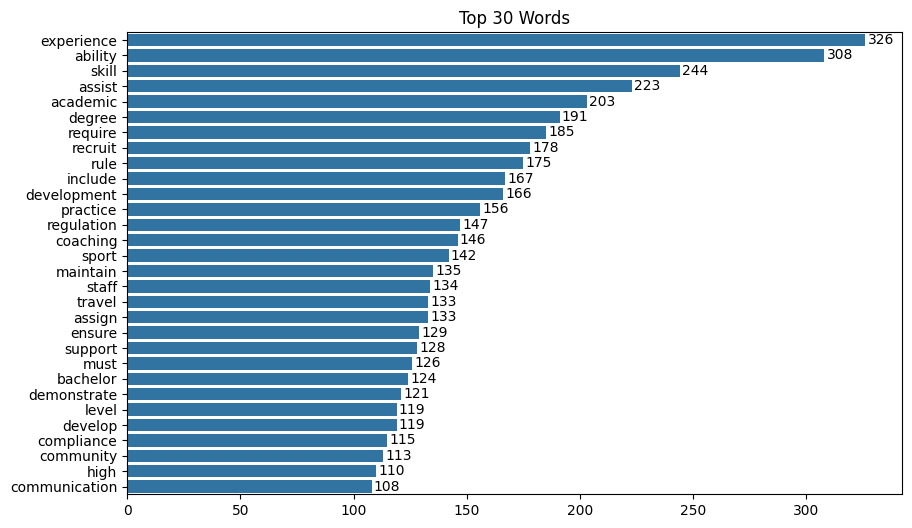

Top Bigrams: [(('of', 'the'), 233), (('with', 'the'), 156), (('Ability', 'to'), 156), (('ability', 'to'), 121), (('rules', 'and'), 102), (('to', 'the'), 102), (('by', 'the'), 100), (('in', 'the'), 98), (('for', 'the'), 98), (('to', 'work'), 81), (('and', 'the'), 78), (('coaching', 'experience'), 71), (('Bachelor’s', 'degree'), 68), (('Assist', 'with'), 68), (('as', 'assigned'), 68), (('at', 'the'), 66), (('duties', 'as'), 66), (('assigned', 'by'), 64), (('compliance', 'with'), 59), (('Director', 'of'), 55)]


In [ ]:
# Word Frequency
# Flatten the list of lists into a single list of words
all_words = [word for text_tokens in data_ready.dropna() for word in text_tokens]

word_freq = Counter(all_words)  # Count word frequencies
top_words = word_freq.most_common(30)
print(top_words)

# Plot Top Words
words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(counts), y=list(words))  # Store the Axes object
plt.title("Top 30 Words")

# Add word counts as text annotations
for p in ax.patches:  # Iterate through the bars (patches)
    width = p.get_width()  # Get the width of the bar
    ax.text(width + 1,       # Position the text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Vertically center the text within the bar
            '{:1.0f}'.format(width),  # Format the count (remove decimal part)
            ha="left", va="center")  # Align the text

plt.show()

# Bigrams
# Assuming 'text' is your original Series of titles before tokenization
bigrams = Counter(ngrams(text.str.cat(sep=' ').split(), 2)).most_common(20)
print("Top Bigrams:", bigrams)

#LDA Topic Modeling

In [ ]:
#Creating a Bag Of Words
from gensim.corpora import Dictionary
pyLDAvis.enable_notebook()

# Assuming 'documents' is a list of tokenized documents
# Filter out NaN values before creating the dictionary and corpus
filtered_data_ready = data_ready.dropna()
text_dict = Dictionary(filtered_data_ready)
corpus = [text_dict.doc2bow(doc) for doc in filtered_data_ready]

#view integer mappings
text_dict.token2id

{'accredited': 0,
 'bachelor': 1,
 'degree': 2,
 'master': 3,
 'prefer': 4,
 'coaching': 5,
 'experience': 6,
 'ideal': 7,
 'level': 8,
 'elite': 9,
 'improve': 10,
 'performance': 11,
 'prove': 12,
 'background': 13,
 'clear': 14,
 'clearance': 15,
 'favorable': 16,
 'investigation': 17,
 'maintain': 18,
 'must': 19,
 'complete': 20,
 'date': 21,
 'driver': 22,
 'injury': 23,
 'insurance': 24,
 'liability': 25,
 'license': 26,
 'motor': 27,
 'personal': 28,
 'training': 29,
 'valid': 30,
 'van': 31,
 'vehicle': 32,
 'within': 33,
 'able': 34,
 'flexible': 35,
 'holiday': 36,
 'include': 37,
 'travel': 38,
 'ability': 39,
 'basic': 40,
 'demonstrate': 41,
 'excel': 42,
 'office': 43,
 'outlook': 44,
 'platform': 45,
 'powerpoint': 46,
 'skill': 47,
 'virtual': 48,
 'word': 49,
 'zoom': 50,
 'across': 51,
 'communication': 52,
 'community': 53,
 'customer': 54,
 'diplomacy': 55,
 'discretion': 56,
 'effectively': 57,
 'excellent': 58,
 'implement': 59,
 'public': 60,
 'relation': 61,
 '

In [ ]:
# Function to compute coherence values for different numbers of topics
def compute_coherence_values(corpus, dictionary, k_min, k_max, step=1):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    # Filter out NaN values before using as texts for CoherenceModel
    filtered_data_ready = data_ready.dropna()

    for num_topics in topic_nums:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return topic_nums, coherence_values

In [ ]:
# Determine the optimal number of topics
k_min, k_max, step = 2, 15, 1
topic_nums, coherence_values = compute_coherence_values(corpus, text_dict, k_min, k_max, step)

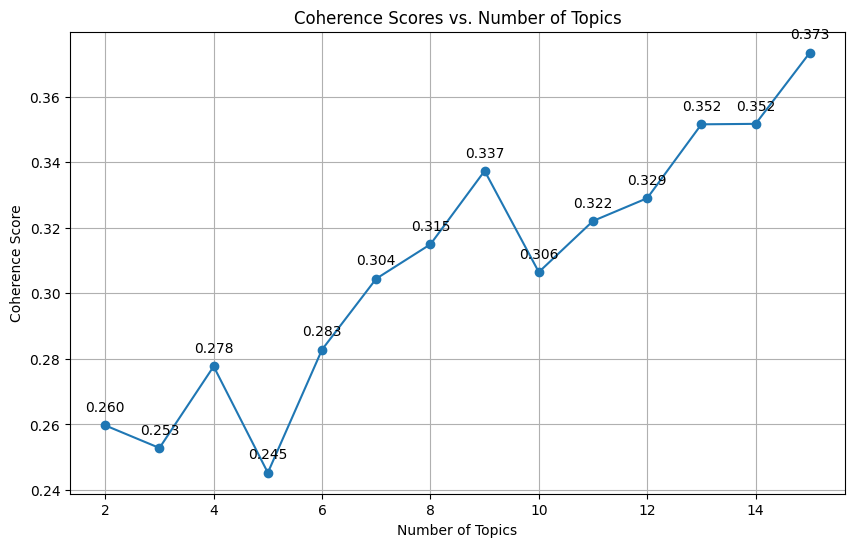

Optimal number of topics: 15


In [ ]:
# Plot coherence score
plt.figure(figsize=(10, 6))
plt.plot(topic_nums, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()

# Annotate each point with its coherence score
for i, txt in enumerate(coherence_values):
    plt.annotate(f"{txt:.3f}", (topic_nums[i], coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

optimal_num_topics = topic_nums[np.argmax(coherence_values)]
print(f"Optimal number of topics: {optimal_num_topics}")

#Stability & Perplexity Score

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
# Prepare data for topic modeling (Scikit-Learn expects strings)
data_ready_sklearn = [' '.join(tokens) for tokens in data_ready]  # Join tokens for Scikit-Learn

# Step 1: Build Scikit-Learn LDA Model with 3 Topics
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

lda_sklearn = LatentDirichletAllocation(n_components=4, learning_decay=0.5, random_state=42)
lda_sklearn.fit(data_vectorized)

LatentDirichletAllocation(learning_decay=0.5, n_components=4, random_state=42)

###Stability Score

Stability for 2 topics: 0.7495522324741594
Stability for 3 topics: 0.8453531422947571
Stability for 4 topics: 0.8582736073539673
Stability for 5 topics: 0.8676508353349411
Stability for 6 topics: 0.8928599446818873
Stability for 7 topics: 0.8636826170948374
Stability for 8 topics: 0.8777143810343222
Stability for 9 topics: 0.9145642351263649
Stability for 10 topics: 0.9351607287798476
Stability for 11 topics: 0.9172247331541226
Stability for 12 topics: 0.923241624614962
Stability for 13 topics: 0.9284468061294331
Stability for 14 topics: 0.9246348270422697
Stability for 15 topics: 0.9291770449386395
Stability score for the optimal number of topics (9): 0.9145642351263649


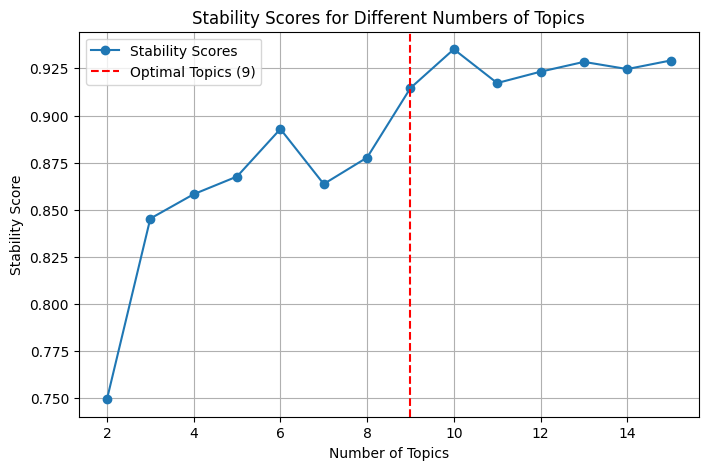

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate stability score for a given number of topics
def calculate_stability(n_components, data, n_runs=5, random_states=range(5)):
    topic_distributions = []
    for seed in random_states:
        lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=seed)
        lda_temp.fit(data)
        topic_distributions.append(lda_temp.components_)

    # Compute pairwise cosine similarities between consecutive topic matrices
    pairwise_similarities = [
        cosine_similarity(a, b).mean()
        for a, b in zip(topic_distributions[:-1], topic_distributions[1:])
    ]
    # Return average stability score
    return np.mean(pairwise_similarities)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 16)  # From 2 to 10 topics
stability_scores = []

# Calculate stability for each number of topics
for n_topics in topic_range:
    score = calculate_stability(n_components=n_topics, data=data_vectorized)
    stability_scores.append(score)
    print(f"Stability for {n_topics} topics: {score}")

# Specific stability for the optimal number of topics (11)
optimal_topics = 9
optimal_score = calculate_stability(n_components=optimal_topics, data=data_vectorized)
print(f"Stability score for the optimal number of topics ({optimal_topics}): {optimal_score}")

# Plot stability scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, stability_scores, marker='o', linestyle='-', label="Stability Scores")
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")
plt.title("Stability Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Stability Score")
plt.grid(True)
plt.legend()
plt.show()

###Perpelxity Score

Topics: 2, Perplexity: 3.694833048144749
Topics: 3, Perplexity: 5.500819500532075
Topics: 4, Perplexity: 7.302639630440579
Topics: 5, Perplexity: 9.055226494982604
Topics: 6, Perplexity: 10.776866518046404
Topics: 7, Perplexity: 14.410422407303049
Topics: 8, Perplexity: 16.42397227085464
Topics: 9, Perplexity: 15.874373293180772
Topics: 10, Perplexity: 17.56555256767414
Topics: 11, Perplexity: 19.255044898859772
Topics: 12, Perplexity: 24.448722273486514
Topics: 13, Perplexity: 26.452316068568322
Topics: 14, Perplexity: 28.455423155290127
Topics: 15, Perplexity: 26.00328394055438
Optimal Number of Topics: 9, Perplexity: 15.874373293180772


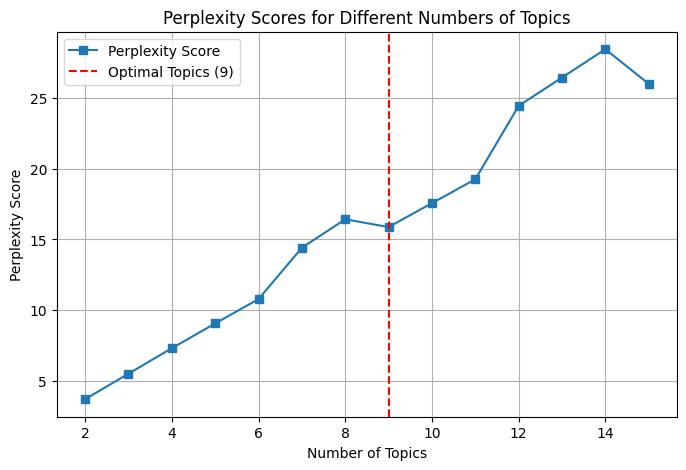

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Example data
data_ready_sklearn = ["sample text data", "another sample text", "more text data for LDA"]

# Vectorize data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

# Function to calculate perplexity score
def calculate_perplexity(n_components, data):
    lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=42)
    lda_temp.fit(data)
    return lda_temp.perplexity(data)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 16)  # From 7 to 13 topics
perplexity_scores = []

# Calculate perplexity for each number of topics
for n_topics in topic_range:
    perplexity_score = calculate_perplexity(n_components=n_topics, data=data_vectorized)
    perplexity_scores.append(perplexity_score)
    print(f"Topics: {n_topics}, Perplexity: {perplexity_score}")

# Specific perplexity for the optimal number of topics
optimal_topics = 9
optimal_perplexity = calculate_perplexity(n_components=optimal_topics, data=data_vectorized)
print(f"Optimal Number of Topics: {optimal_topics}, Perplexity: {optimal_perplexity}")

# Plot perplexity scores
plt.figure(figsize=(8, 5))

# Perplexity Scores
plt.plot(topic_range, perplexity_scores, marker='s', linestyle='-', label='Perplexity Score')

# Highlight Optimal Topics
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")

# Formatting the Plot
plt.title("Perplexity Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.legend()
plt.grid(True)
plt.show()


#LDA Modeling

In [ ]:
#Fitting the LDA Model
from gensim.models.ldamodel import LdaModel

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=text_dict,
                                           num_topics=9,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.080*"rule" + 0.063*"regulation" + 0.062*"recruiting" + 0.055*"sport" + '
  '0.054*"knowledge" + 0.045*"understanding" + 0.026*"compliance" + '
  '0.022*"director" + 0.022*"employee" + 0.021*"perform"'),
 (1,
  '0.081*"professional" + 0.045*"event" + 0.040*"practice" + 0.038*"assist" + '
  '0.038*"development" + 0.034*"supervise" + 0.032*"equipment" + '
  '0.028*"performance" + 0.027*"fundraising" + 0.024*"condition"'),
 (2,
  '0.317*"experience" + 0.129*"coaching" + 0.074*"level" + 0.045*"playing" + '
  '0.036*"high" + 0.031*"previous" + 0.022*"academic" + 0.022*"travel" + '
  '0.014*"play" + 0.014*"relate"'),
 (3,
  '0.077*"environment" + 0.032*"general" + 0.031*"policy" + 0.029*"manual" + '
  '0.027*"individual" + 0.026*"encourage" + 0.021*"american" + 0.020*"value" + '
  '0.020*"desire" + 0.019*"south"'),
 (4,
  '0.108*"certification" + 0.077*"successful" + 0.060*"aid" + 0.054*"cpr" + '
  '0.048*"first" + 0.046*"competitive" + 0.035*"recruitment" + 0.029*"ae" + '
  '0.028*

In [ ]:
def save_pkl(path, data) :
  '''
  params
  path: "filename.pkl" -- change filename(the saving location)
  data: data you want to save
  '''
  with open(path, 'wb') as f :
    pickle.dump(data, f)

  return "Save success at {}".format(path)

def load_pkl(path) :

  '''
  path: loacation for saved pickle file
  '''

  with open(path, 'rb') as f:
    data = pickle.load(f)

  return data

In [ ]:
#assign to each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in tqdm(enumerate(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

                temp_to_append = pd.DataFrame({'Dominant_Topic':[int(topic_num)], 'Perc_Contribution': [round(prop_topic,4)],
                                               'Topic_Keywords':[topic_keywords]})
                #print(temp_to_append)
                sent_topics_df = pd.concat([sent_topics_df, temp_to_append], ignore_index=False)
                #print(sent_topics_df)

            else:
                break
    print(sent_topics_df.head(10))
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #with open('sent_topic_df.pkl', 'wb') as f:
    #  pickle.dump(sent_topics_df,f)
    # Add original text to the end of the output
    #contents = list(texts)
    text_temp_df = pd.DataFrame({'Text': list(data_ready)})
    sent_topics_df = sent_topics_df.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, text_temp_df], axis=1, ignore_index = False)

    return(sent_topics_df)


#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)


# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)
save_pkl("/content/drive/MyDrive/Data/NCAA_Coach/df_dominant_topic_NCAA_JobRT.pkl", df_dominant_topic)



3105it [00:03, 884.25it/s]

   Dominant_Topic  Perc_Contribution  \
0               8             0.8730   
0               2             0.8222   
0               7             0.3017   
0               6             0.5954   
0               6             0.7016   
0               7             0.3931   
0               7             0.5174   
0               8             0.5037   
0               0             0.6836   
0               7             0.7899   

                                                                                        Topic_Keywords  
0               prefer, degree, master, skill, require, field, write, communication, significant, lift  
0                 experience, coaching, level, playing, high, previous, academic, travel, play, relate  
0          ability, include, recruit, demonstrate, staff, office, computer, promotion, medium, setting  
0              must, able, frequent, training, provide, maintain, bass, regular, association, standard  
0              must, able, frequen

'Save success at /content/drive/MyDrive/Data/NCAA_Coach/df_dominant_topic_NCAA_JobRT.pkl'

In [ ]:
df_dominant_topic.to_csv('/content/drive/MyDrive/Data/NCAA_Coach/NCAA_Job_Description.csv', index=False)
data = load_pkl("/content/drive/MyDrive/Data/NCAA_Coach/df_dominant_topic_NCAA_JobRT.pkl")
data

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,8,0.8730,"prefer, degree, master, skill, require, field, write, communication, significant, lift","[bachelor, degree, accredited, master, degree, prefer]"
1,2,0.8222,"experience, coaching, level, playing, high, previous, academic, travel, play, relate","[experience, coaching, level, ideal]"
2,7,0.3017,"ability, include, recruit, demonstrate, staff, office, computer, promotion, medium, setting","[prove, experience, improve, performance, elite, ideal]"
3,6,0.5954,"must, able, frequent, training, provide, maintain, bass, regular, association, standard","[must, clear, maintain, favorable, background, investigation, clearance]"
4,6,0.7016,"must, able, frequent, training, provide, maintain, bass, regular, association, standard","[must, maintain, valid, driver, license, motor, vehicle, liability, insurance, personal, injury,..."
...,...,...,...,...
3100,8,0.8519,"prefer, degree, master, skill, require, field, write, communication, significant, lift","[excellent, write, verbal, communication, skill]"
3101,8,0.5246,"prefer, degree, master, skill, require, field, write, communication, significant, lift","[strong, organizational, multitaske, ability]"
3102,8,0.8222,"prefer, degree, master, skill, require, field, write, communication, significant, lift","[bachelor, degree, accredit, prefer]"
3103,2,0.2323,"experience, coaching, level, playing, high, previous, academic, travel, play, relate","[competitive, bass, experience, prefer]"


In [ ]:
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')
sent_topics_outdf_grpd
for i, grp in sent_topics_outdf_grpd:
  print(i, grp)

0       Dominant_Topic  Perc_Contribution  \
8                  0             0.6836   
12                 0             0.7639   
13                 0             0.1889   
18                 0             0.3704   
24                 0             0.4494   
...              ...                ...   
3066               0             0.7778   
3071               0             0.5278   
3082               0             0.4420   
3089               0             0.5278   
3099               0             0.5278   

                                                                                           Topic_Keywords  \
8     rule, regulation, recruiting, sport, knowledge, understanding, compliance, director, employee, p...   
12    rule, regulation, recruiting, sport, knowledge, understanding, compliance, director, employee, p...   
13    rule, regulation, recruiting, sport, knowledge, understanding, compliance, director, employee, p...   
18    rule, regulation, recruiting, sport, kn

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
#sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.8709,"recruit, sport, successful, physical, knowledge, rule, experience_prefer, assist, rule_regulatio...","[assist, on_campus, recruit, visit, showcase, benefit, recruit]"
1,1,0.8237,"regulation, must, activity, provide, training, general, soccer, plan, group, knowledge_rule","[must, clean, driving_record, valid_driver, license]"
2,2,0.8148,"skill, management, time, recruiting, supervise, communicate, coordinate, information, football, set","[excellent, interpersonal_skill, strong, communication_skill]"
3,3,0.9159,"prefer, experience, coach_experience, master_degree, collegiate, level, previous, coaching_exper...","[bachelor_degree, plus, collegiate_level, competition, coach_experience, commitment, philosophy,..."
4,4,0.9299,"certification, must_able, campus, employee, stand, use, bend, need, lift, first_aid","[outdoors, hot, cold, weather, exposure, element, rain, snow, dirt, fume, loud, noise]"
5,5,0.8981,"require, include, field, travel, frequent, hour, recruitment, exercise, support, fundraise","[frequent, districtwide, statewide, travel, frequent, prolong, irregular, hour]"
6,6,0.7842,"performance, maintain, understanding, appropriate, develop, standard, effective, national, evalu...","[prepare, clear, concise, comprehensive, write_oral, report]"
7,7,0.3997,"act, lifelong, desire, teacher, allegheny, south, gulf, mature, statement, ethical","[act, teacher, sport, track_field]"
8,8,0.8701,"ability, professional, playing_experience, demonstrate, season, environment, development, staff,...","[responsible, safety, behavior, appearance, manager, represent]"
9,9,0.0909,"prefer, specialization, receiver, quarterback, wide, master_degree, previous, coach_experience, ...",[enjoy]


In [ ]:
print(df_dominant_topic)
df_dominant_topic.to_csv(r'/content/drive/My Drive/Data/NCAA_Coach/NCAA_Job_RT.csv')

      Dominant_Topic  Perc_Contribution  \
0                  3             0.8182   
1                  3             0.6477   
2                  3             0.4456   
3                  6             0.5343   
4                  1             0.6362   
...              ...                ...   
2954               3             0.5227   
2955               8             0.7724   
2956               3             0.8182   
2957               3             0.6180   
2958               2             0.4168   

                                                                                           Topic_Keywords  \
0     prefer, experience, coach_experience, master_degree, collegiate, level, previous, coaching_exper...   
1     prefer, experience, coach_experience, master_degree, collegiate, level, previous, coaching_exper...   
2     prefer, experience, coach_experience, master_degree, collegiate, level, previous, coaching_exper...   
3     performance, maintain, understanding, app

In [ ]:
import json
import numpy as np
import pyLDAvis
from pyLDAvis import gensim_models

# Define a new encoder
class CleanJSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, (np.complex128, np.complex64)):
            return float(obj.real)
        if isinstance(obj, (np.float32, np.float64)):
            return float(obj)
        if isinstance(obj, (np.int32, np.int64)):
            return int(obj)
        return super().default(obj)

# Patch pyLDAvis encoder (important step)
pyLDAvis.utils.json = json
pyLDAvis.utils.json.JSONEncoder = CleanJSONEncoder


# Visualize topics with pyLDAvis
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, text_dict, sort_topics=False)
pyLDAvis.display(lda_display)


#Word2Vec & UMAP

In [ ]:
# Create Skip Gram model
model = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 10,
                                             window = 5, sg = 1)

model.save("/content/drive/MyDrive/Data/NCAA_Coach/NCAA_Coach_skip_gram_w2v.model")

In [ ]:
model = Word2Vec.load("/content/drive/MyDrive/Data/NCAA_Coach/NCAA_Coach_skip_gram_w2v.model")
reducer = UMAP(n_neighbors = 5, n_components = 2, verbose = True)

X = model.wv[model.wv.index_to_key]
X_l = model.wv.index_to_key

cluster_embedding = reducer.fit_transform(X)
df = pd.DataFrame(cluster_embedding)

UMAP(n_neighbors=5, verbose=True)
Tue Sep  2 03:47:05 2025 Construct fuzzy simplicial set
Tue Sep  2 03:47:08 2025 Finding Nearest Neighbors
Tue Sep  2 03:47:13 2025 Finished Nearest Neighbor Search
Tue Sep  2 03:47:16 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Sep  2 03:47:20 2025 Finished embedding


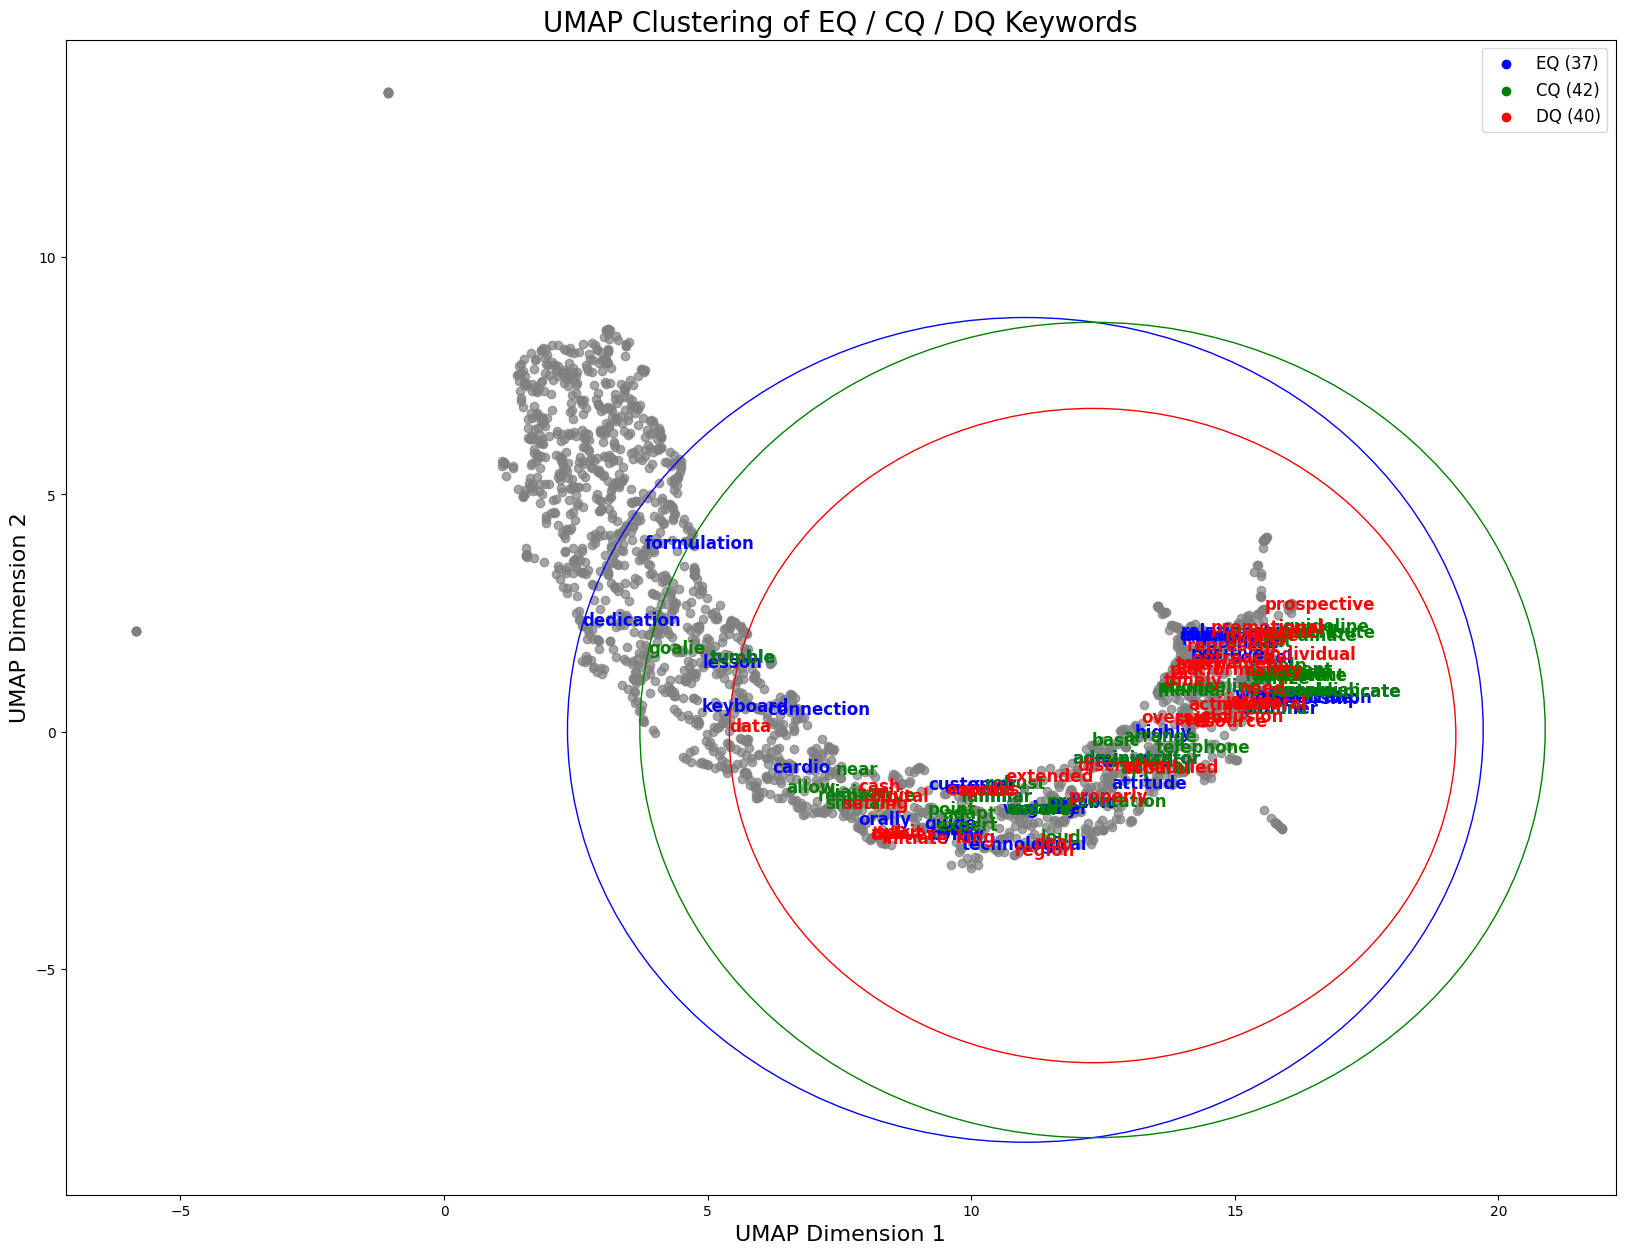

In [ ]:
# --- Setup & Imports ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assumptions (must exist in your environment):
# - data_ready: list[list[str]] tokenized docs used to train your Word2Vec model
# - model: trained gensim Word2Vec model (model.wv is available)
# - df: pandas.DataFrame with 2D UMAP coordinates for your vocabulary (columns: 0, 1)
# - X_l: list[str] of vocabulary terms aligned to rows of df (len(X_l) == len(df))

# --- Build corpus for TF-IDF vocabulary gating ---
corpus = [" ".join(tokens) for tokens in data_ready]

tfidf = TfidfVectorizer(
    stop_words="english",
    max_df=1.0,
    min_df=1,
    max_features=3000
)
X_tfidf = tfidf.fit_transform(corpus)
tfidf_vocab = set(tfidf.get_feature_names_out())

# --- Theory-driven seeds (EQ, CQ, DQ) ---
# Keep seeds short, general, and likely to appear in job/coach texts
seed_keywords = {
    "EQ": [
        # awareness/regulation/relationship management
        "communicate", "relationship", "leadership", "positive"
    ],
    "CQ": [
        # meta/cog/motiv/behavioral capabilities for cross-context functioning
        "culture", "establish", "interact", "coordinate"
    ],
    "DQ": [
        # data/tool/platform fluency; safety/ethics
        "digital", "media", "data", "platform"
    ],
}

# --- Expand seeds via Word2Vec neighbors, gate by TF-IDF vocab ---
def expand_with_w2v(seeds, topn=10):
    related = []
    for w in seeds:
        if w in model.wv:
            # neighbors -> keep those present in tf-idf vocab to avoid junk
            sim_words = [t for t, _ in model.wv.most_similar(w, topn=topn)]
            related.extend([t for t in sim_words if t in tfidf_vocab])
    # also keep original seeds that appear in the tf-idf vocab
    filtered_seeds = [t for t in seeds if t in tfidf_vocab]
    return sorted(set(filtered_seeds + related))

expanded_keywords = {k: expand_with_w2v(v, topn=10) for k, v in seed_keywords.items()}

# --- Build clusters (choose any distinct colors you like) ---
keyword_clusters = {
    dim: {"keywords": words, "color": color}
    for dim, words, color in zip(
        ["EQ", "CQ", "DQ"],
        [expanded_keywords["EQ"], expanded_keywords["CQ"], expanded_keywords["DQ"]],
        ["blue", "green", "red"]
    )
}

# --- Plot: UMAP background + annotated cluster terms + enclosing circles ---
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)

# background scatter (all tokens)
ax.scatter(df[0], df[1], alpha=0.7, color="gray")

# quick index from token -> row index (assumes X_l aligned to df rows)
index_by_token = {tok: i for i, tok in enumerate(X_l)}

cluster_points = {cluster: [] for cluster in keyword_clusters}

for cluster, details in keyword_clusters.items():
    for tok in details["keywords"]:
        i = index_by_token.get(tok)
        if i is not None:
            x, y = df.loc[i, 0], df.loc[i, 1]
            ax.annotate(
                tok,
                (x, y),
                color=details["color"],
                fontsize=12,
                weight="bold"
            )
            cluster_points[cluster].append((x, y))

# draw minimal enclosing circles (approx by max radius from centroid)
for cluster, pts in cluster_points.items():
    if pts:
        pts = np.array(pts)
        center = pts.mean(axis=0)
        radius = np.linalg.norm(pts - center, axis=1).max()
        circle = plt.Circle(
            center,
            radius,
            color=keyword_clusters[cluster]["color"],
            fill=False,
            linestyle="-",
            linewidth=1.0
        )
        ax.add_patch(circle)

# titles / labels / legend
ax.set_title("UMAP Clustering of EQ / CQ / DQ Keywords", fontsize=20)
ax.set_xlabel("UMAP Dimension 1", fontsize=16)
ax.set_ylabel("UMAP Dimension 2", fontsize=16)

for cluster, details in keyword_clusters.items():
    ax.scatter([], [], color=details["color"], label=f"{cluster} ({len(details['keywords'])})")

ax.legend(fontsize=12)
plt.show()

In [ ]:
# --- Print expanded lists for auditing ---
for dim, details in keyword_clusters.items():
    print(f"\n🔹 {dim} Keywords ({len(details['keywords'])}):")
    print(", ".join(sorted(details["keywords"])))


🔹 EQ Keywords (37):
administrator, alumnus, assure, attitude, bylaw, cardio, communicate, community, connection, customer, dedication, effective, entire, exhibit, familiar, formulation, gather, guide, highly, keyboard, leadership, lesson, miss, orally, organization, people, personnel, positive, potential, public, relationship, summer, talented, technological, tumble, verbally, wide

🔹 CQ Keywords (42):
accord, adapt, administrator, allow, apparel, arrange, assure, basic, catholic, communicate, contribute, coordinate, counseling, culture, establish, expert, familiar, function, goalie, guideline, help, interact, liaison, loud, manual, mature, motivate, near, opponent, parent, people, phone, point, presentation, respective, responsible, robust, similar, telephone, tumble, utilize, visit

🔹 DQ Keywords (40):
act, active, away, cash, data, deal, deliver, digital, discretion, express, extended, general, inclusion, individual, initiate, issue, king, manage, matter, media, model, need, outrea

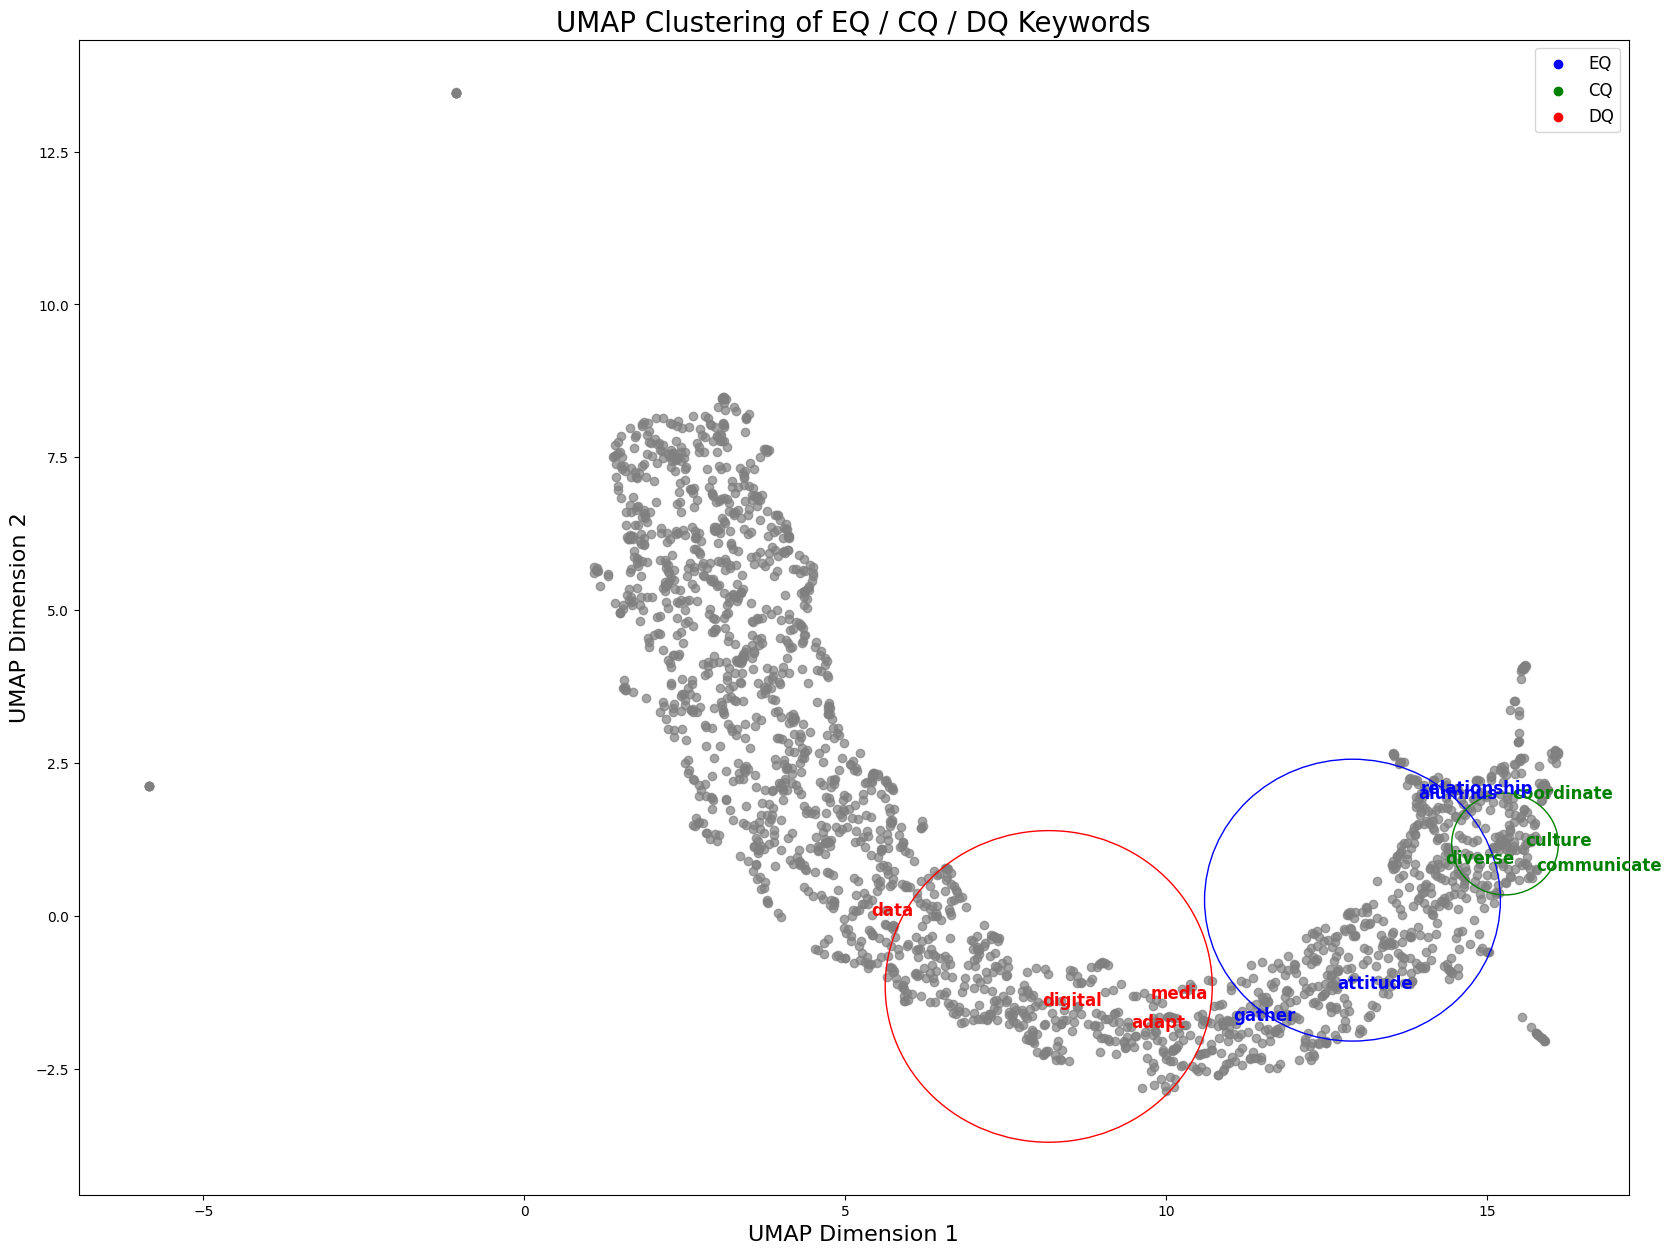

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define keyword clusters and their respective colors (example seeds)
keyword_clusters = {
    'EQ': {'keywords': ["relationship", "attitude", "gather", "alumnus"], 'color': 'blue'},
    'CQ': {'keywords': ["culture", "coordinate", "diverse", "communicate"], 'color': 'green'},
    'DQ': {'keywords': ["digital", "media", "data", "adapt"], 'color': 'red'},
}

# Plot the UMAP scatterplot
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df[0], df[1], alpha=0.7, color='gray')  # Background scatterplot

# Annotate keywords based on their cluster and collect points for circles
cluster_points = {cluster: [] for cluster in keyword_clusters}
for i, txt in enumerate(X_l):
    for cluster, details in keyword_clusters.items():
        if txt in details['keywords']:
            ax.annotate(
                txt,
                (df.loc[i][0], df.loc[i][1]),
                color=details['color'],
                fontsize=12,
                weight='bold'
            )
            cluster_points[cluster].append((df.loc[i][0], df.loc[i][1]))

# Draw smaller circles around clusters (scaled radius)
shrink_factor = 0.85  # adjust this value (0.5 = tighter, 1.0 = original size)
for cluster, points in cluster_points.items():
    if points:
        points = np.array(points)
        center = points.mean(axis=0)
        radius = np.linalg.norm(points - center, axis=1).max() * shrink_factor
        circle = plt.Circle(center, radius, color=keyword_clusters[cluster]['color'],
                            fill=False, linestyle='-', linewidth=1)
        ax.add_patch(circle)

# Add title and labels for clarity
ax.set_title('UMAP Clustering of EQ / CQ / DQ Keywords', fontsize=20)
ax.set_xlabel('UMAP Dimension 1', fontsize=16)
ax.set_ylabel('UMAP Dimension 2', fontsize=16)

# Create a legend for the clusters
for cluster, details in keyword_clusters.items():
    ax.scatter([], [], color=details['color'], label=cluster)

ax.legend(fontsize=12)
plt.show()


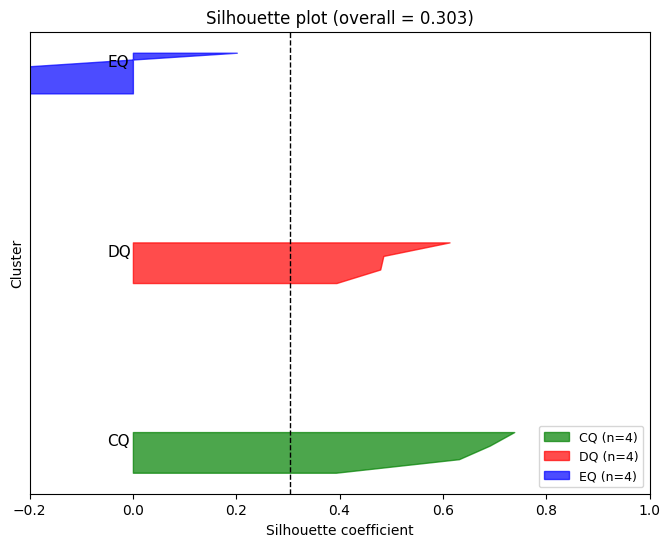

Overall silhouette: 0.30328795
Per-cluster silhouette: {'CQ': 0.6131772398948669, 'DQ': 0.49256837368011475, 'EQ': -0.19588175415992737}


In [ ]:
# --- Silhouette scores for UMAP keyword clusters ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

def compute_umap_keyword_silhouette(df, X_l, keyword_clusters, random_state=42):
    """
    df: pandas DataFrame with two columns (UMAP dims) accessible as df[0], df[1]
    X_l: iterable of string tokens (same length as df), one per point
    keyword_clusters: dict like {'EQ': {'keywords': [...], 'color': 'blue'}, ...}

    Returns:
        overall_score (float), per_cluster_scores (dict)
    Also draws a silhouette plot for the clustered subset.
    """
    # Map each keyword to its cluster
    token_to_cluster = {}
    for cluster, details in keyword_clusters.items():
        for kw in details['keywords']:
            token_to_cluster[kw] = cluster

    # Build labels for points that match any keyword
    point_labels = []
    point_indices = []
    for i, token in enumerate(X_l):
        cluster = token_to_cluster.get(token)
        if cluster is not None:
            point_labels.append(cluster)
            point_indices.append(i)

    if len(point_indices) == 0:
        raise ValueError("No points matched the provided keywords; cannot compute silhouette.")

    # Extract the 2D embeddings for the matched points
    X2d = df.loc[point_indices, [0, 1]].to_numpy()

    # Need at least 2 clusters present
    unique_clusters = sorted(set(point_labels))
    if len(unique_clusters) < 2:
        raise ValueError(f"Only one cluster present among matched points: {unique_clusters}. "
                         "Silhouette requires >= 2 clusters.")

    # Map string cluster labels to integers for sklearn
    cluster_to_int = {c: i for i, c in enumerate(unique_clusters)}
    y = np.array([cluster_to_int[c] for c in point_labels], dtype=int)

    # Overall silhouette
    overall = silhouette_score(X2d, y, metric='euclidean')

    # Per-sample and per-cluster averages
    s_samples = silhouette_samples(X2d, y, metric='euclidean')
    per_cluster = {}
    for c in unique_clusters:
        mask = np.array(point_labels) == c
        per_cluster[c] = float(np.mean(s_samples[mask]))

    # --- Plot silhouette diagram ---
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10
    colors = {c: keyword_clusters[c]['color'] if c in keyword_clusters else None for c in unique_clusters}

    for c in unique_clusters:
        ci = cluster_to_int[c]
        ith_vals = s_samples[y == ci]
        ith_vals.sort()
        size = ith_vals.shape[0]
        y_upper = y_lower + size

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals,
                         alpha=0.7, label=f"{c} (n={size})",
                         color=colors.get(c, None))
        ax.text(-0.05, y_lower + 0.5 * size, c, fontsize=11)
        y_lower = y_upper + 10  # spacing between clusters

    ax.set_title(f"Silhouette plot (overall = {overall:.3f})")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")
    ax.axvline(x=overall, color="k", linestyle="--", linewidth=1)
    ax.set_yticks([])
    ax.set_xlim([-0.2, 1.0])
    ax.legend(loc="lower right", fontsize=9)
    plt.show()

    return overall, per_cluster

# --- Example usage (with your existing variables df, X_l, and keyword_clusters) ---
# Make sure keyword_clusters contains the agreed keywords:
keyword_clusters = {
    'EQ': {'keywords': ["relationship", "attitude", "gather", "alumnus"], 'color': 'blue'},
    'CQ': {'keywords': ["culture", "coordinate", "diverse", "communicate"], 'color': 'green'},
    'DQ': {'keywords': ["digital", "media", "data", "adapt"], 'color': 'red'},
}

overall_sil, per_cluster_sil = compute_umap_keyword_silhouette(df, X_l, keyword_clusters)
print("Overall silhouette:", overall_sil)
print("Per-cluster silhouette:", per_cluster_sil)


#VADER Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Create an instance of the SentimentIntensityAnalyzer class and define a function to calculate the sentiment score:
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/TGL/Pre_List.csv")

# Filter the DataFrame to include only rows where 'Lang' is 'en'
# Use .copy() to ensure df_en is a new DataFrame, not a view
df_en = df[df['Lang'] == 'en'].copy()

# Select the 'Title' column for LDA Topic modeling
# Changed line: Renaming 'text' to 'title_text' for clarity
title_text = df_en['Title']

# Drop rows with NaN values in the 'Title' column
title_text = title_text.dropna()

# Add the title_text Series as a new column to the DataFrame df_en
# Use .loc for explicit assignment to avoid SettingWithCopyWarning
df_en.loc[:, 'text'] = title_text

# Apply the VADER sentiment analysis function to the 'text' column in df_en
# Use .loc for explicit assignment to avoid SettingWithCopyWarning
df_en.loc[:, 'sentiment_score'] = df_en['text'].apply(get_vader_sentiment_score)

# Extract positive, negative, neutral, and compound scores into separate columns (using df_en)
# Use .loc for explicit assignment to avoid SettingWithCopyWarning
df_en.loc[:, 'positive_score'] = df_en['sentiment_score'].apply(lambda x: x['pos'])
df_en.loc[:, 'negative_score'] = df_en['sentiment_score'].apply(lambda x: x['neg'])
df_en.loc[:, 'neutral_score'] = df_en['sentiment_score'].apply(lambda x: x['neu'])
df_en.loc[:, 'compound_score'] = df_en['sentiment_score'].apply(lambda x: x['compound'])

# Calculate the average scores for each sentiment component (using df_en)
average_positive_score = df_en['positive_score'].mean()
average_negative_score = df_en['negative_score'].mean()
average_neutral_score = df_en['neutral_score'].mean()
average_compound_score = df_en['compound_score'].mean()

# Print the average sentiment scores
print("Average Positive Score:", average_positive_score)
print("Average Negative Score:", average_negative_score)
print("Average Neutral Score:", average_neutral_score)
print("Average Compound Score:", average_compound_score)

NameError: name 'get_vader_sentiment_score' is not defined

KeyError: 'text'